In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
pd.set_option('display.max_columns', 500)
import seaborn as sns

In [3]:
from matplotlib import rcParams
#rcParams['font.family'] = 'Arial'
%matplotlib inline

In [4]:
from cdcp.experiment_info import subjects
from cdcp.paths import DATA_PATH_MAGPI
from cdcp.behavior.data import prepare_behavior_data
from cdcp.visualization.colors import colors
subjects, DATA_PATH_MAGPI
from cdcp.paths import DATA_PATH_MAGPI, FIGURE_DIR, ensure_dir
from cdcp.general import save_fig

/n/groups/datta/tim_sainburg/projects/CDCP_paper/cdcp/general.py:6: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [5]:
from cdcp.paths import DATA_DIR, ensure_dir

In [6]:
import scipy.stats

In [7]:
from cdcp.visualization.colors import colors as cdcp_colors

In [8]:
from cdcp.behavior.data import bin_data, cue_direction

## load data

In [9]:
def prepare_behavior_data(data, num_bins=16, num_prev=np.inf):
    """ parses information from raw bahav_data dataframes
    """
    # subset normal trials
    data = data[data["response"] != "none"]
    
    # Subset part of the dataset
    if num_prev != np.inf:
        data = data[-num_prev:]

    # Extract the response as a boolean
    data["response_bool"] = 0
    data.loc[data["response"] == "L", "response_bool"] = 1
    
    # flip interpolation 0-127 so 0 corresponds to left, and 127 corresponds to right (to make it easier to read)
    #data['interpolation_point'] = 127 - data['interpolation_point']
    data['response_bool'] = 1 - data['response_bool'] 

    # specify interpolation info
    data["interpolation"] = [
        ls + rs for ls, rs in zip(data.left_stim.values, data.right_stim.values)
    ]

    # bin data into 32 equally sized bins
    data["pos_bin"], bins = bin_data(
        data["interpolation_point"].values.astype("float32"), num_bins
    )
    data["cue_direction"] = data.cue_id.apply(cue_direction)
    return data, bins

In [10]:
# grab the final nex trials for each subject
total_trials = 0
nex = 1000000
behav_data_all = []
for subject in tqdm(subjects):
    # load data
    behav_data_subject = pd.read_pickle(
        DATA_DIR / "behavior" / "subject_behavior_dfs" / f"{subject}.pickle.zip",
        compression="zip",
    )
    # prep dataset
    behav_data_subject, bins = prepare_behavior_data(behav_data_subject, num_bins=32)

    print(subject, len(behav_data_subject))

    # get trial count
    total_trials += len(behav_data_subject)

    behav_data_subject = behav_data_subject[behav_data_subject.rt.isnull() == False]
    
    # skip trials where the choice is still binary
    behav_data_subject = behav_data_subject[5000:] 
    if True:
        skip_point = np.where(
            behav_data_subject#.sort_values(by="time")
            .interpolation_point.isin([0, 127])
            .values
            == False
        )[0][0]
        behav_data_subject = behav_data_subject[skip_point:]

    # get the most recent NEX trials
    behav_data_subject = behav_data_subject[-nex:]
    behav_data_subject["subject"] = subject
    behav_data_all.append(behav_data_subject)
    
    
    
behav_data_all = pd.concat(behav_data_all)
behav_data_all = behav_data_all[behav_data_all.rt >= 0]

  0%|          | 0/20 [00:00<?, ?it/s]/tmp/ipykernel_14365/3664274659.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["response_bool"] = 0
/tmp/ipykernel_14365/3664274659.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['response_bool'] = 1 - data['response_bool']
/tmp/ipykernel_14365/3664274659.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

B1174 444899


  5%|▌         | 1/20 [00:02<00:55,  2.92s/it]/tmp/ipykernel_14365/3664274659.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["response_bool"] = 0
/tmp/ipykernel_14365/3664274659.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['response_bool'] = 1 - data['response_bool']
/tmp/ipykernel_14365/3664274659.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

B1426 424782


 10%|█         | 2/20 [00:05<00:50,  2.83s/it]/tmp/ipykernel_14365/3664274659.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["response_bool"] = 0
/tmp/ipykernel_14365/3664274659.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['response_bool'] = 1 - data['response_bool']
/tmp/ipykernel_14365/3664274659.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

B1170 586050


 15%|█▌        | 3/20 [00:10<01:00,  3.58s/it]/tmp/ipykernel_14365/3664274659.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["response_bool"] = 0
/tmp/ipykernel_14365/3664274659.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['response_bool'] = 1 - data['response_bool']
/tmp/ipykernel_14365/3664274659.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

B1432 822151


 20%|██        | 4/20 [00:16<01:17,  4.83s/it]/tmp/ipykernel_14365/3664274659.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["response_bool"] = 0
/tmp/ipykernel_14365/3664274659.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['response_bool'] = 1 - data['response_bool']
/tmp/ipykernel_14365/3664274659.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

B1437 108765


/tmp/ipykernel_14365/3664274659.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["response_bool"] = 0
/tmp/ipykernel_14365/3664274659.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['response_bool'] = 1 - data['response_bool']
/tmp/ipykernel_14365/3664274659.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

B1433 227809


/tmp/ipykernel_14365/3664274659.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["response_bool"] = 0
/tmp/ipykernel_14365/3664274659.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['response_bool'] = 1 - data['response_bool']
/tmp/ipykernel_14365/3664274659.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

B1597 271881


 35%|███▌      | 7/20 [00:20<00:28,  2.20s/it]/tmp/ipykernel_14365/3664274659.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["response_bool"] = 0
/tmp/ipykernel_14365/3664274659.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['response_bool'] = 1 - data['response_bool']
/tmp/ipykernel_14365/3664274659.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

B1427 457989


 40%|████      | 8/20 [00:22<00:28,  2.39s/it]/tmp/ipykernel_14365/3664274659.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["response_bool"] = 0
/tmp/ipykernel_14365/3664274659.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['response_bool'] = 1 - data['response_bool']
/tmp/ipykernel_14365/3664274659.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

B1188 99807


/tmp/ipykernel_14365/3664274659.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["response_bool"] = 0
/tmp/ipykernel_14365/3664274659.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['response_bool'] = 1 - data['response_bool']
/tmp/ipykernel_14365/3664274659.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

B1244 301779


 50%|█████     | 10/20 [00:24<00:17,  1.74s/it]/tmp/ipykernel_14365/3664274659.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["response_bool"] = 0
/tmp/ipykernel_14365/3664274659.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['response_bool'] = 1 - data['response_bool']
/tmp/ipykernel_14365/3664274659.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

B1590 215348


/tmp/ipykernel_14365/3664274659.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["response_bool"] = 0
/tmp/ipykernel_14365/3664274659.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['response_bool'] = 1 - data['response_bool']
/tmp/ipykernel_14365/3664274659.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

B1399 147911


/tmp/ipykernel_14365/3664274659.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["response_bool"] = 0
/tmp/ipykernel_14365/3664274659.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['response_bool'] = 1 - data['response_bool']
/tmp/ipykernel_14365/3664274659.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

B1591 189463


/tmp/ipykernel_14365/3664274659.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["response_bool"] = 0
/tmp/ipykernel_14365/3664274659.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['response_bool'] = 1 - data['response_bool']
/tmp/ipykernel_14365/3664274659.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

B1252 231626


/tmp/ipykernel_14365/3664274659.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["response_bool"] = 0
/tmp/ipykernel_14365/3664274659.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['response_bool'] = 1 - data['response_bool']
/tmp/ipykernel_14365/3664274659.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

B1110 163466


/tmp/ipykernel_14365/3664274659.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["response_bool"] = 0
/tmp/ipykernel_14365/3664274659.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['response_bool'] = 1 - data['response_bool']
/tmp/ipykernel_14365/3664274659.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

B1390 156954


/tmp/ipykernel_14365/3664274659.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["response_bool"] = 0
/tmp/ipykernel_14365/3664274659.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['response_bool'] = 1 - data['response_bool']
/tmp/ipykernel_14365/3664274659.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

B1248 224734


/tmp/ipykernel_14365/3664274659.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["response_bool"] = 0
/tmp/ipykernel_14365/3664274659.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['response_bool'] = 1 - data['response_bool']
/tmp/ipykernel_14365/3664274659.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

B1593 394567


 90%|█████████ | 18/20 [00:33<00:02,  1.48s/it]/tmp/ipykernel_14365/3664274659.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["response_bool"] = 0
/tmp/ipykernel_14365/3664274659.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['response_bool'] = 1 - data['response_bool']
/tmp/ipykernel_14365/3664274659.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

B1595 120982


/tmp/ipykernel_14365/3664274659.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["response_bool"] = 0
/tmp/ipykernel_14365/3664274659.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['response_bool'] = 1 - data['response_bool']
/tmp/ipykernel_14365/3664274659.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

B1276 203416


### Check whether correctness differs by reaction time 

In [14]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [15]:
df = behav_data_all[['subject', 'rt', 'correct']]

In [20]:
# Mixed Linear Model
model = smf.mixedlm("rt ~ correct", df, groups=df["subject"])
result = model.fit()

/n/groups/datta/tim_sainburg/conda_envs/cdcp_paper/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


In [21]:
# Summary of the model
result.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
           Mixed Linear Model Regression Results
============================================================
Model:            MixedLM  Dependent Variable: rt           
No. Observations: 5347468  Method:             REML         
No. Groups:       20       Scale:              0.5490       
Min. group size:  76748    Log-Likelihood:     -5984437.6302
Max. group size:  808137   Converged:          Yes          
Mean group size:  267373.4                                  
------------------------------------------------------------
                Coef.  Std.Err.    z     P>|z| [0.025 0.975]
------------------------------------------------------------
Intercept        0.933    0.166    5.630 0.000  0.608  1.258
correct[T.True] -0.298    0.001 -339.448 0.000 -0.299 -0.296
Group Var        0.549                                      
============================================================

"""

### Subset only correct trials

In [22]:
behav_data_all = behav_data_all[behav_data_all.correct == True]
behav_data_all = behav_data_all[behav_data_all.rt < 2]

## Get reaction time, controlling for nonlinear effects of side bias over time

In [28]:
def smooth_array(arr, block_size = 1000):
    """
    Smooths a 1D array using a block filter of length 1000.

    Args:
        arr (numpy.ndarray): A 1D array to be smoothed.

    Returns:
        numpy.ndarray: A smoothed version of the input array.
    """
    # Pad the input array with zeros to handle edges
    pad_size = int(block_size/2)
    arr_padded = np.pad(arr, pad_size, mode='median')[:-1]

    # Create a block filter of length 1000
    block_filter = np.ones(block_size) / block_size

    # Convolve the padded array with the block filter
    smoothed_arr = np.convolve(arr_padded, block_filter, mode='valid')

    return smoothed_arr

In [29]:
def z_score(x):
    return (x - np.nanmean(x)) / np.nanstd(x)

In [30]:
n_trials_to_smooth_over = 500

  0%|          | 0/20 [00:00<?, ?it/s]

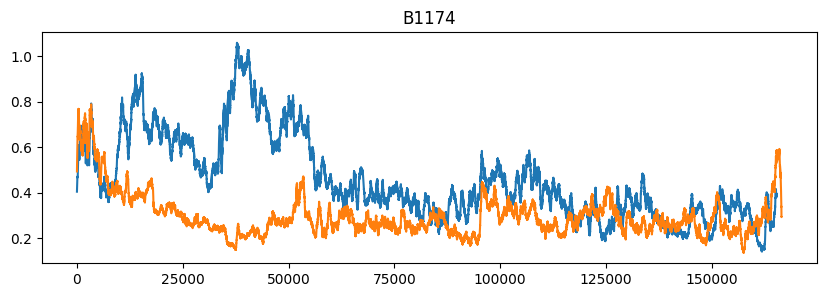

  5%|▌         | 1/20 [00:00<00:18,  1.01it/s]

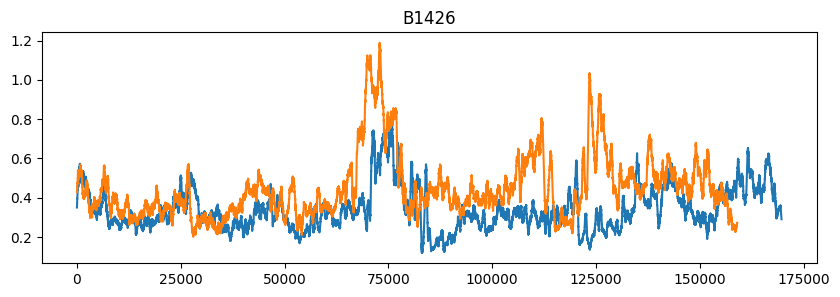

 10%|█         | 2/20 [00:01<00:14,  1.27it/s]

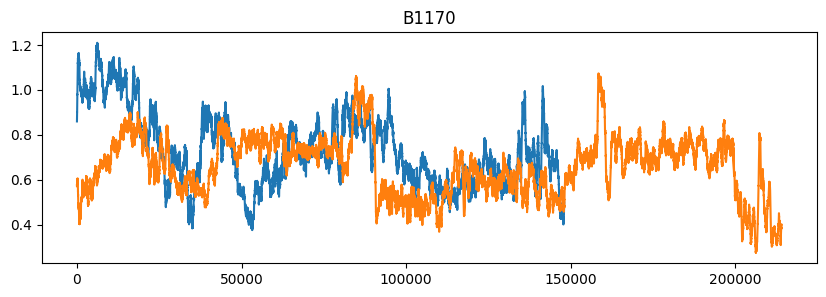

 15%|█▌        | 3/20 [00:02<00:12,  1.37it/s]

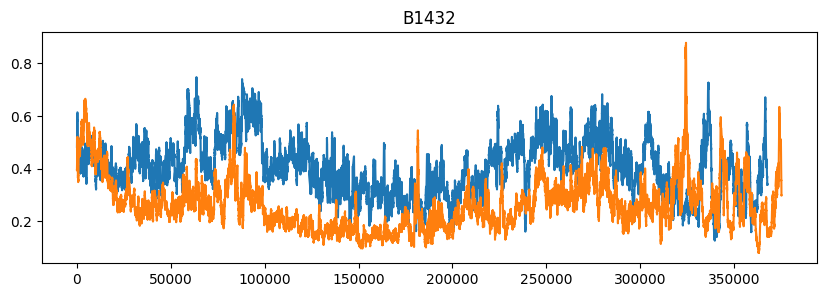

 20%|██        | 4/20 [00:03<00:12,  1.32it/s]

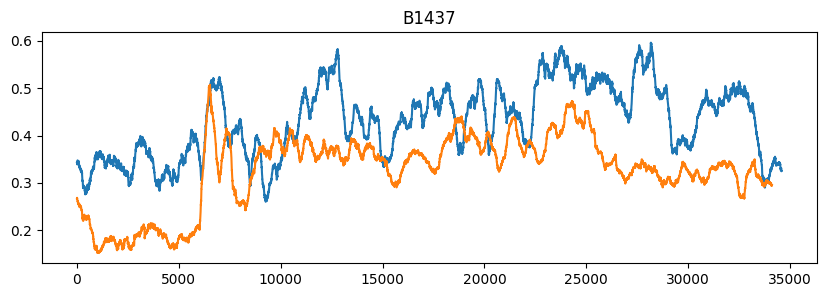

 25%|██▌       | 5/20 [00:03<00:10,  1.49it/s]

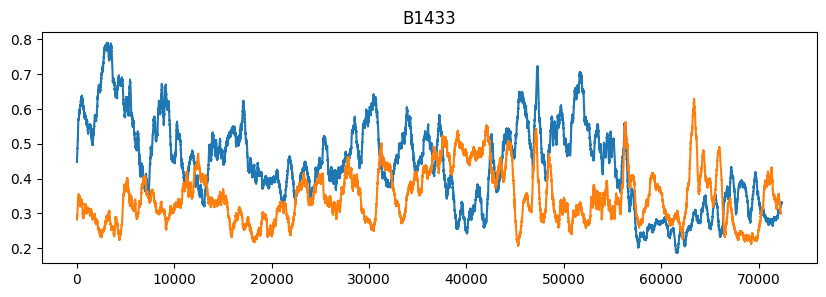

 30%|███       | 6/20 [00:04<00:09,  1.53it/s]

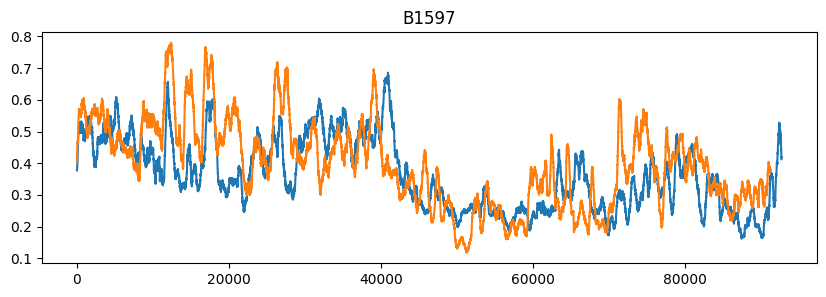

 35%|███▌      | 7/20 [00:04<00:08,  1.58it/s]

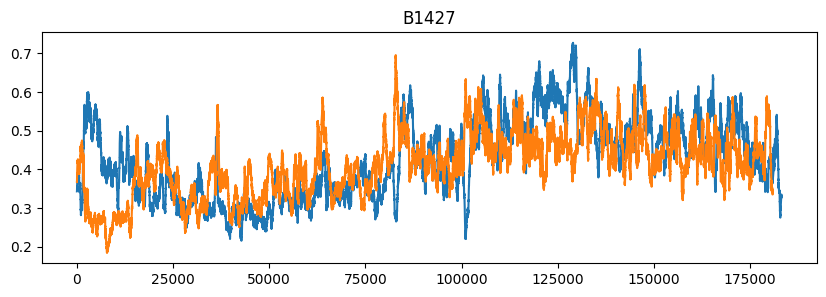

 40%|████      | 8/20 [00:05<00:07,  1.56it/s]

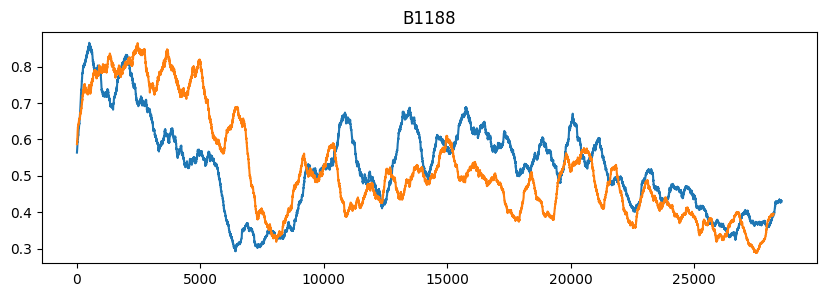

 45%|████▌     | 9/20 [00:05<00:06,  1.67it/s]

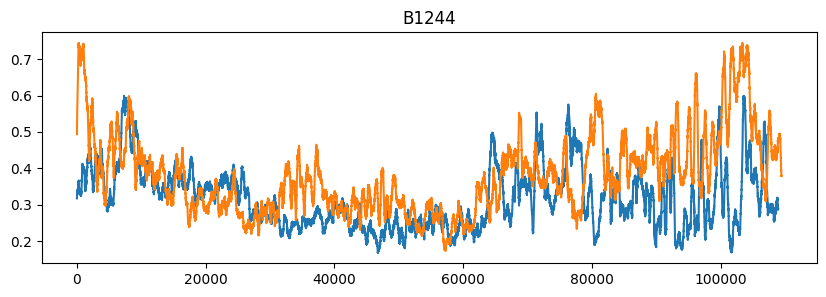

 50%|█████     | 10/20 [00:06<00:05,  1.69it/s]

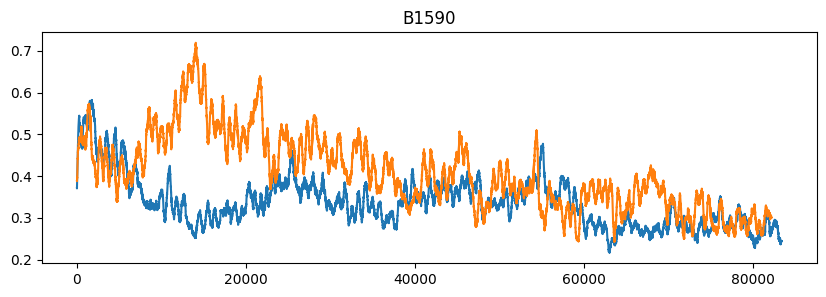

 55%|█████▌    | 11/20 [00:07<00:05,  1.73it/s]

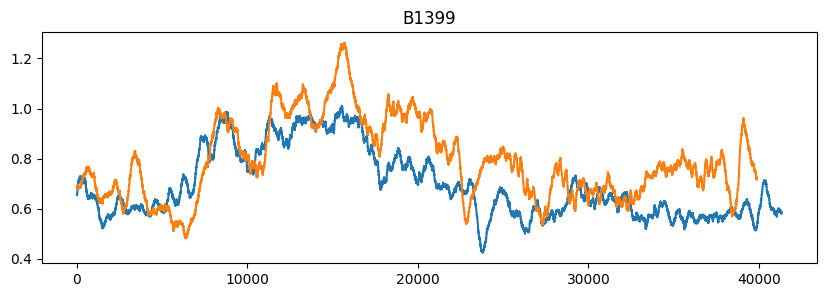

 60%|██████    | 12/20 [00:07<00:04,  1.81it/s]

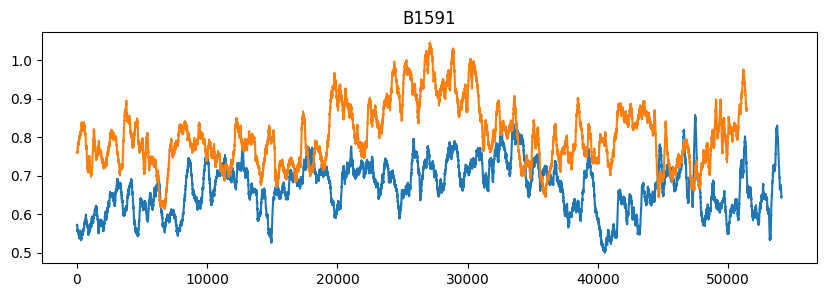

 65%|██████▌   | 13/20 [00:08<00:03,  1.80it/s]

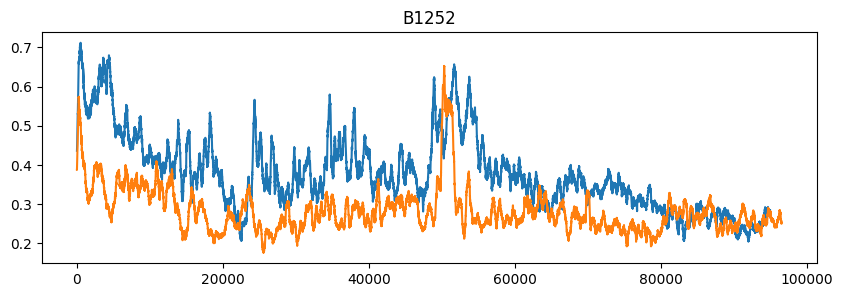

 70%|███████   | 14/20 [00:08<00:03,  1.80it/s]

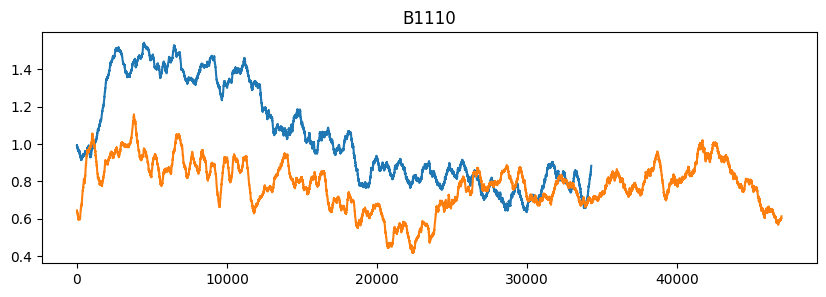

 75%|███████▌  | 15/20 [00:09<00:02,  1.86it/s]

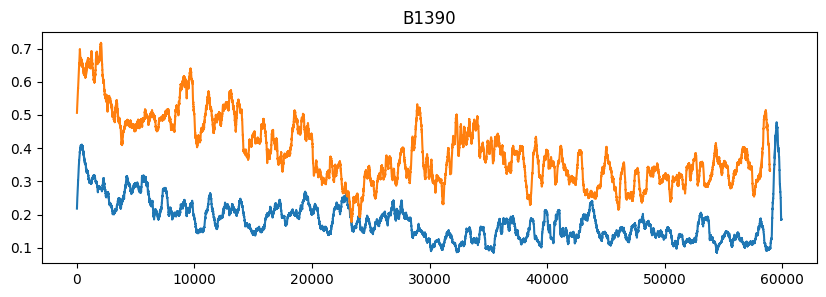

 80%|████████  | 16/20 [00:09<00:02,  1.85it/s]

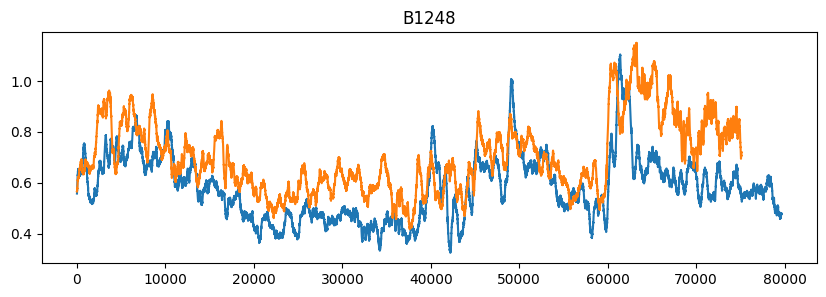

 85%|████████▌ | 17/20 [00:10<00:01,  1.83it/s]

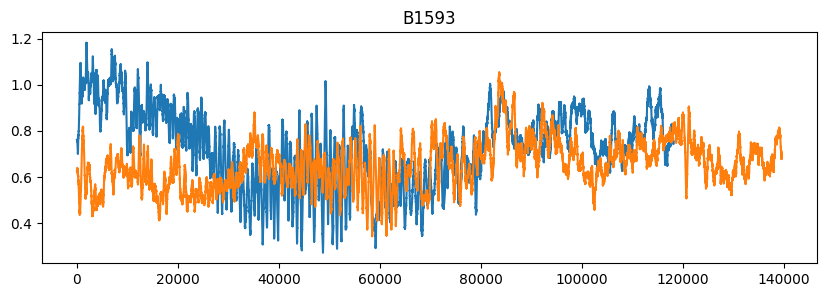

 90%|█████████ | 18/20 [00:10<00:01,  1.77it/s]

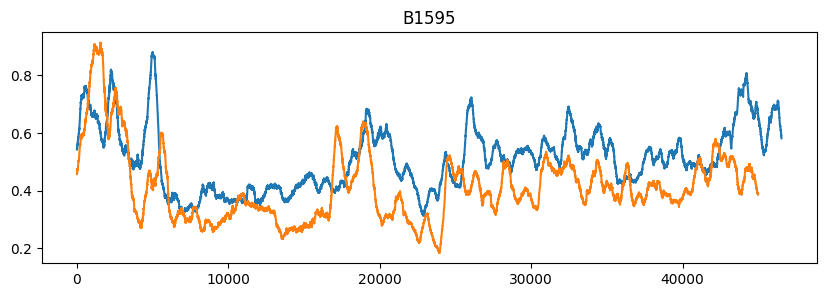

 95%|█████████▌| 19/20 [00:12<00:00,  1.37it/s]

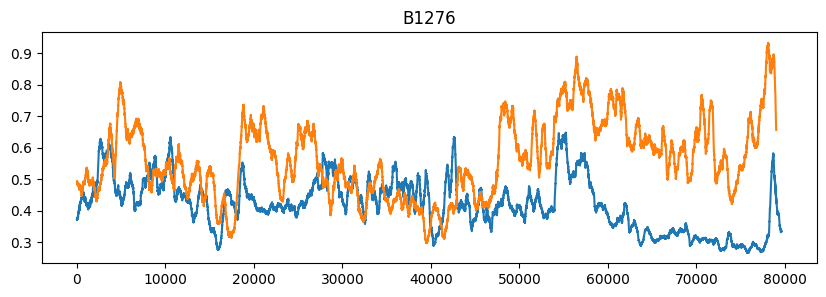

100%|██████████| 20/20 [00:12<00:00,  1.58it/s]


In [31]:
behav_data_all["normed_rt_time"] = np.nan
for subject in tqdm(behav_data_all.subject.unique()):
    subject_trials = behav_data_all.subject.values == subject
    left_trials = behav_data_all.class_.values == "L"
    right_trials = behav_data_all.class_.values == "R"

    smoothed_left = smooth_array(
        behav_data_all.loc[
            subject_trials & left_trials,
            "rt",
        ].values,
        n_trials_to_smooth_over,
    )

    smoothed_right = smooth_array(
        behav_data_all.loc[
            subject_trials & right_trials,
            "rt",
        ].values,
        n_trials_to_smooth_over,
    )
    
    fig, ax = plt.subplots(figsize=(10,3))
    ax.set_title(subject)
    ax.plot(smoothed_left)
    ax.plot(smoothed_right)
    plt.show()

    behav_data_all.loc[
        subject_trials & left_trials,
        "normed_rt_time",
    ] = z_score(behav_data_all.loc[
            subject_trials & left_trials,
            "rt",
        ].values - smoothed_left)
   

    behav_data_all.loc[
        subject_trials & right_trials,
        "normed_rt_time",
    ] = z_score(behav_data_all.loc[
            subject_trials & right_trials,
            "rt",
        ].values - smoothed_right)
    

### Control for side bias, fixed over time

In [83]:
behav_data_all["normed_rt_class"] = np.nan
for subject in tqdm(behav_data_all.subject.unique()):
  
    # based on actual side
    behav_data_all.loc[
        (behav_data_all.subject.values == subject) & (behav_data_all.class_.values == "L"),
        "normed_rt_class",
    ] = z_score(
        behav_data_all.loc[
            (behav_data_all.subject.values == subject) & (behav_data_all.class_.values == "L"),
            "rt",
        ]
    )
    
    behav_data_all.loc[
        (behav_data_all.subject.values == subject) & (behav_data_all.class_.values == "R"),
        "normed_rt_class",
    ] = z_score(
        behav_data_all.loc[
            (behav_data_all.subject.values == subject) & (behav_data_all.class_.values == "R"),
            "rt",
        ]
    )

100%|██████████| 20/20 [00:07<00:00,  2.75it/s]


In [85]:
behav_data_all[:3]

,session,index,type_,stimulus,class_,response,correct,rt,reward,punish,cue_class,cue_id,cue_prob,num_stims,flip_cues,binary_choice,cueing,left_stim,right_stim,interpolation_point,prob_cue,prob_cued_no_cue,data_file,response_bool,interpolation,pos_bin,cue_direction,subject,self_initiated,normed_rt_time,normed_rt_side_cue,interpolation_bin,cued_class_prob,normed_rt_class
time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-04-12 07:22:03.913804,1,1,normal,/home/bird/opdat/B1174/stimuli/CF/NC/NC_CF_091...,L,L,True,1.607013,True,False,NC,NC,0.5,3,False,False,False,C,F,36,0.0,0.0,/mnt/cube/RawData/Magpi/B1174/B1174_trialdata_...,0,CF,9,N,B1174,NaN,3.282376,2.987800,9,0.5,2.798283
2019-04-12 07:59:15.341180,1,10,normal,/home/bird/opdat/B1174/stimuli/BF/NC/NC_BF_018...,R,R,True,0.687282,False,False,NC,NC,0.5,3,False,False,False,B,F,109,0.0,0.0,/mnt/cube/RawData/Magpi/B1174/B1174_trialdata_...,1,BF,27,N,B1174,NaN,0.686127,0.720871,27,0.5,1.308388
2019-04-12 08:00:21.438401,1,13,correction,/home/bird/opdat/B1174/stimuli/AG/NC/NC_AG_036...,R,R,True,1.778613,False,False,NC,NC,0.5,3,False,False,False,A,G,91,0.0,0.0,/mnt/cube/RawData/Magpi/B1174/B1174_trialdata_...,1,AG,23,N,B1174,NaN,4.564390,4.599134,23,0.5,4.988912


### Does prior prob predict response time

In [88]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [91]:
p_dict = {
    'L': {
        'CL1':0.875, 'NC':0.5, 'CL0':0.75, 'CR1':0.125, 'CR0':0.25, 'CN':0.5
    },
    'R': {
        'CL1':0.125, 'NC':0.5, 'CL0':0.25, 'CR1':0.875, 'CR0':0.75, 'CN':0.5
    }
}
def get_dict(class_, id_):
    return p_dict[class_][id_]
cued_class_prob = behav_data_all.apply(lambda row: get_dict(row['class_'], row['cue_id']), axis=1).values
behav_data_all['cued_class_prob'] = cued_class_prob

In [92]:
df = behav_data_all[['subject', 'rt', 'class_', 'cued_class_prob']]

In [94]:
# Define the LME model
model = smf.mixedlm("rt ~ cued_class_prob", df, 
                    groups=df["subject"], 
                    re_formula="1 + class_")
result = model.fit()

/n/groups/datta/tim_sainburg/conda_envs/cdcp_paper/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


In [95]:
# Summary of the model
result.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
               Mixed Linear Model Regression Results
====================================================================
Model:                MixedLM    Dependent Variable:   rt           
No. Observations:     4209025    Method:               REML         
No. Groups:           20         Scale:                0.1485       
Min. group size:      56779      Log-Likelihood:       -1959391.7868
Max. group size:      743136     Converged:            Yes          
Mean group size:      210451.2                                      
--------------------------------------------------------------------
                        Coef.  Std.Err.    z     P>|z| [0.025 0.975]
--------------------------------------------------------------------
Intercept                0.598    0.086    6.937 0.000  0.429  0.767
cued_class_prob         -0.151    0.001 -188.011 0.000 -0.152 -0.149
Group Var                0.149                                      
Group x class_[T.R] Cov  0.000                                      
class_[T.R] Var          0.149                                      
====================================================================

"""

### Control for cue strength * side interaction for time smoothed

  0%|          | 0/20 [00:00<?, ?it/s]

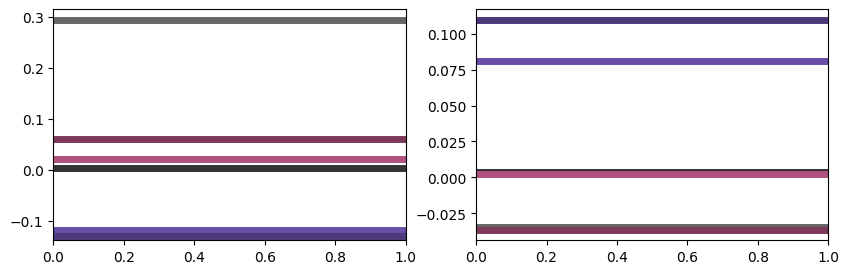

  5%|▌         | 1/20 [00:02<00:43,  2.27s/it]

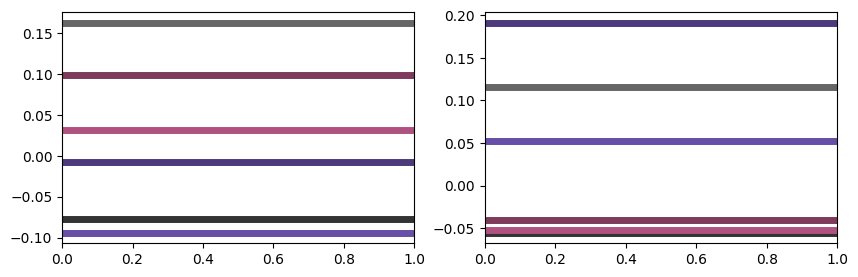

 10%|█         | 2/20 [00:04<00:41,  2.28s/it]

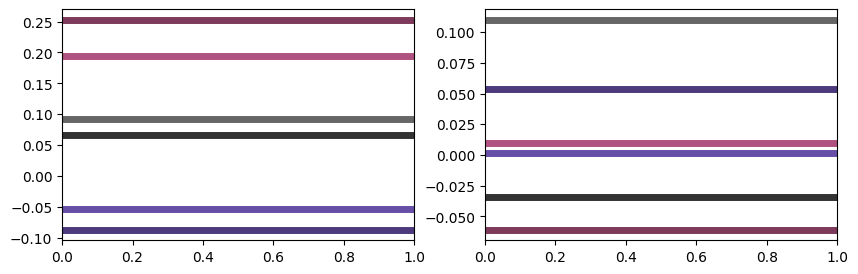

 15%|█▌        | 3/20 [00:06<00:38,  2.29s/it]

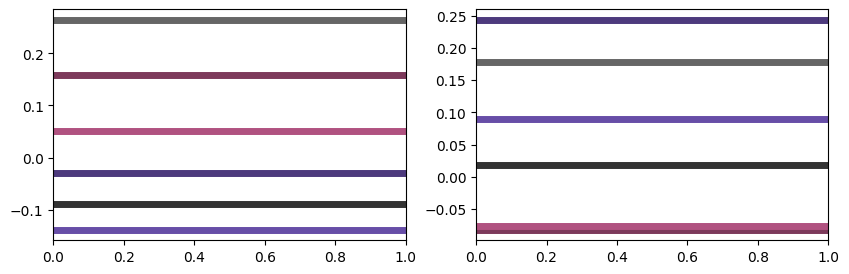

 20%|██        | 4/20 [00:09<00:37,  2.31s/it]

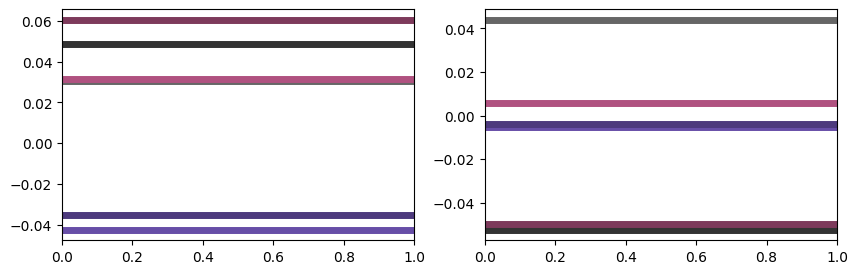

 25%|██▌       | 5/20 [00:11<00:34,  2.30s/it]

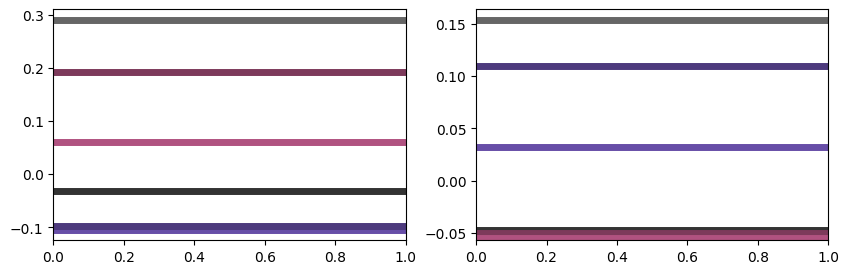

 30%|███       | 6/20 [00:13<00:32,  2.29s/it]

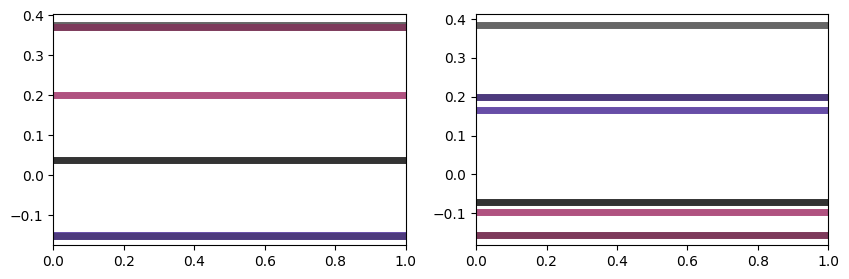

 35%|███▌      | 7/20 [00:16<00:29,  2.30s/it]

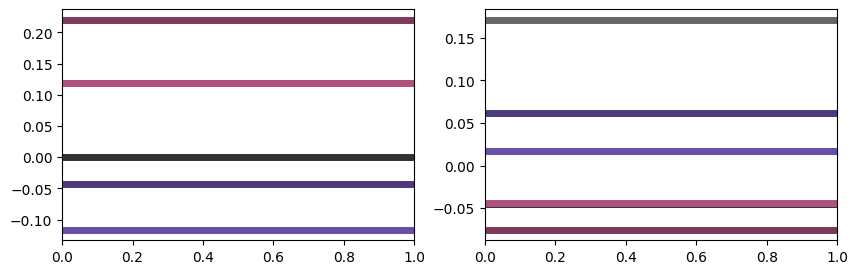

 40%|████      | 8/20 [00:18<00:27,  2.33s/it]

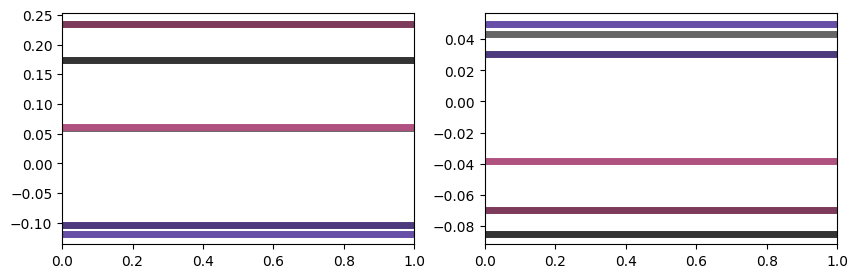

 45%|████▌     | 9/20 [00:20<00:25,  2.34s/it]

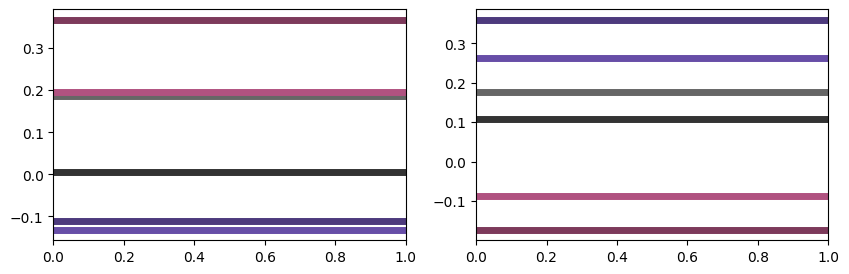

 50%|█████     | 10/20 [00:23<00:23,  2.32s/it]

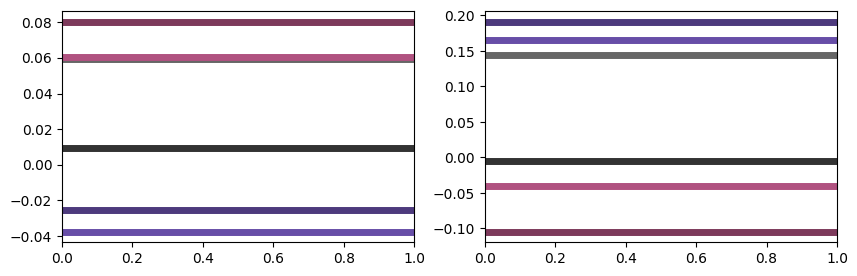

 55%|█████▌    | 11/20 [00:26<00:22,  2.52s/it]

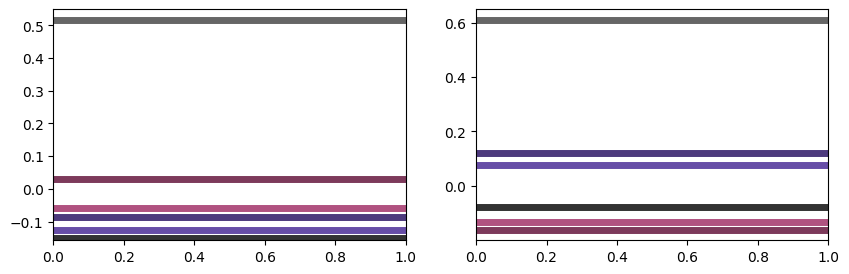

 60%|██████    | 12/20 [00:28<00:19,  2.45s/it]

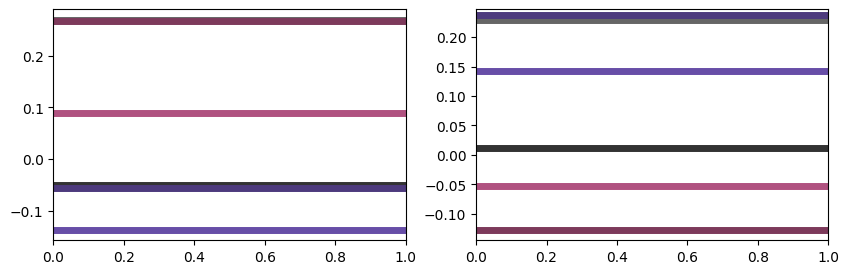

 65%|██████▌   | 13/20 [00:30<00:16,  2.39s/it]

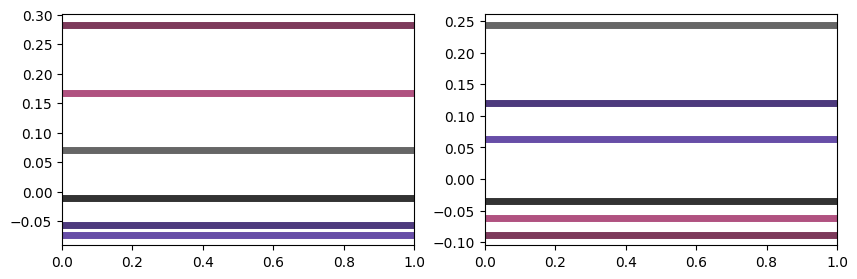

 70%|███████   | 14/20 [00:32<00:14,  2.37s/it]

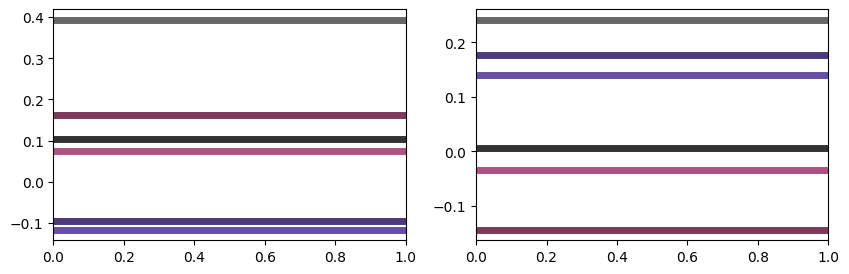

 75%|███████▌  | 15/20 [00:35<00:11,  2.33s/it]

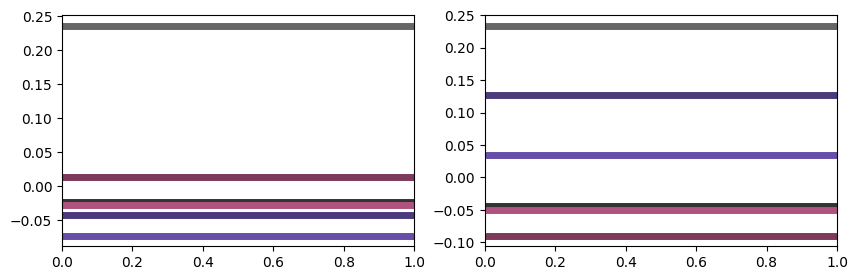

 80%|████████  | 16/20 [00:37<00:09,  2.32s/it]

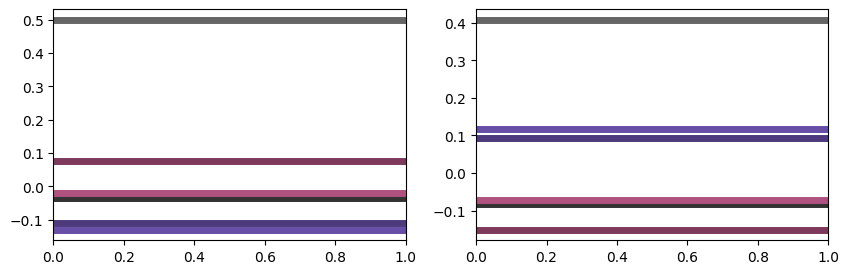

 85%|████████▌ | 17/20 [00:39<00:06,  2.31s/it]

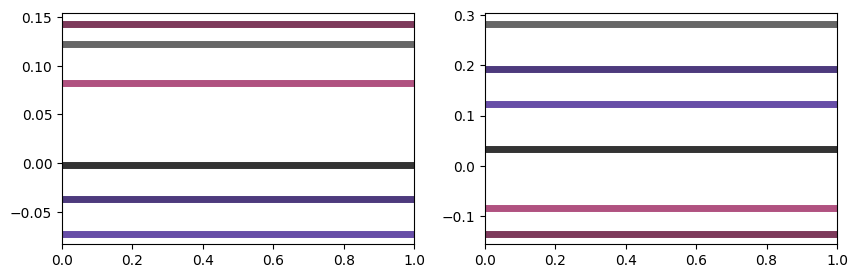

 90%|█████████ | 18/20 [00:42<00:04,  2.32s/it]

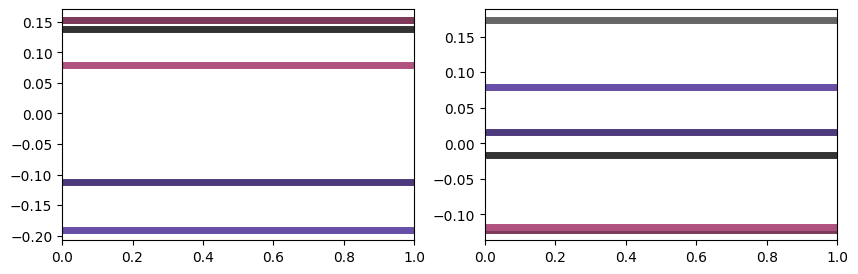

 95%|█████████▌| 19/20 [00:44<00:02,  2.31s/it]

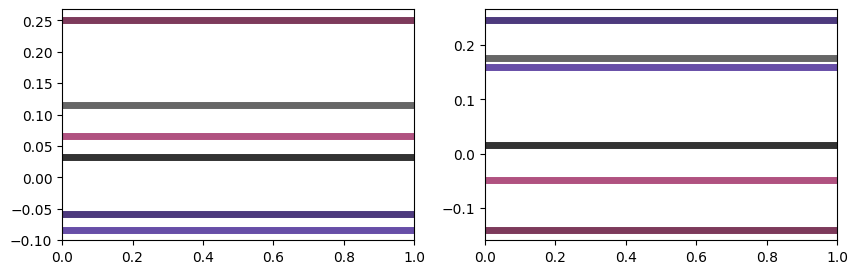

100%|██████████| 20/20 [00:46<00:00,  2.34s/it]


In [32]:
behav_data_all["normed_rt_side_cue"] = np.nan
for subject in tqdm(behav_data_all.subject.unique()):
    subject_trials = behav_data_all.subject.values == subject

    fig, axs = plt.subplots(ncols = 2, figsize=(10,3))

    for side in ["L", "R"]:
        side_trials = behav_data_all.class_.values == side
        
        ax = axs[0] if side == "L" else axs[1]
        
        # set border color cdcp_colors["reinforce"][side]["dark"]

        for cue in behav_data_all.cue_id.unique():
            cue_trials = behav_data_all.cue_id.values == cue

            cue_bias = np.mean(
                behav_data_all.loc[
                        subject_trials & cue_trials & side_trials,
                        "normed_rt_time",
                    ].values
            )

            ax.axhline(cue_bias, color=cdcp_colors["cue_pal"][cue], lw =5)

            behav_data_all.loc[
                subject_trials & side_trials & cue_trials,
                "normed_rt_side_cue",
            ] =  behav_data_all.loc[
                subject_trials & side_trials & cue_trials,
                        "normed_rt_time",
                    ].values - cue_bias

    plt.show()
    #break

In [61]:
behav_data_all[:3]

,session,index,type_,stimulus,class_,response,correct,rt,reward,punish,cue_class,cue_id,cue_prob,num_stims,flip_cues,binary_choice,cueing,left_stim,right_stim,interpolation_point,prob_cue,prob_cued_no_cue,data_file,response_bool,interpolation,pos_bin,cue_direction,subject,self_initiated,normed_rt_time,normed_rt_side_cue,interpolation_bin
time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-04-12 07:22:03.913804,1,1,normal,/home/bird/opdat/B1174/stimuli/CF/NC/NC_CF_091...,L,L,True,1.607013,True,False,NC,NC,0.5,3,False,False,False,C,F,36,0.0,0.0,/mnt/cube/RawData/Magpi/B1174/B1174_trialdata_...,0,CF,9,N,B1174,NaN,3.282376,2.987800,9
2019-04-12 07:59:15.341180,1,10,normal,/home/bird/opdat/B1174/stimuli/BF/NC/NC_BF_018...,R,R,True,0.687282,False,False,NC,NC,0.5,3,False,False,False,B,F,109,0.0,0.0,/mnt/cube/RawData/Magpi/B1174/B1174_trialdata_...,1,BF,27,N,B1174,NaN,0.686127,0.720871,27
2019-04-12 08:00:21.438401,1,13,correction,/home/bird/opdat/B1174/stimuli/AG/NC/NC_AG_036...,R,R,True,1.778613,False,False,NC,NC,0.5,3,False,False,False,A,G,91,0.0,0.0,/mnt/cube/RawData/Magpi/B1174/B1174_trialdata_...,1,AG,23,N,B1174,NaN,4.564390,4.599134,23


In [33]:
behav_data_all['interpolation_bin'] = behav_data_all['pos_bin']

In [34]:
rt_column = "normed_rt_side_cue"

100%|██████████| 20/20 [00:14<00:00,  1.40it/s]


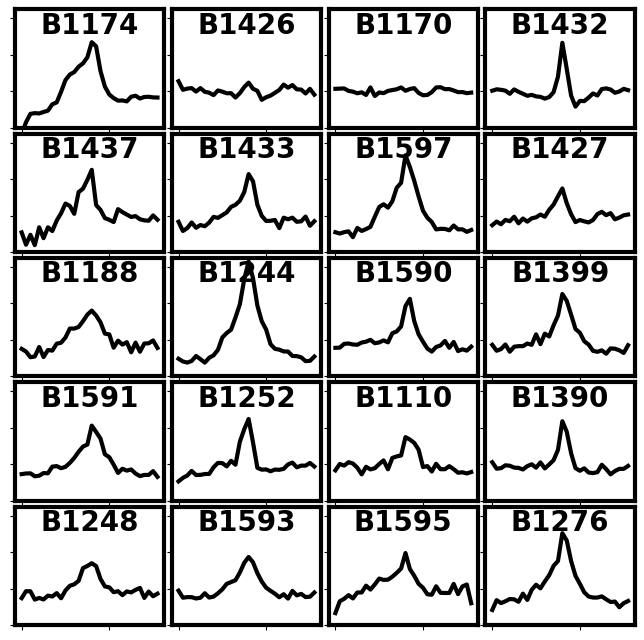

In [35]:
ncols = 4
nrows = 5
fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=(8, 8), gridspec_kw = {'wspace':0.05, 'hspace':0.05})
for axi, subject in enumerate(tqdm(behav_data_all.subject.unique())):
    ax = axs.flatten()[axi]
    behav_data_bird = behav_data_all[behav_data_all.subject == subject]
    sns.lineplot(
        x="interpolation_bin",
        y=rt_column,
        data=behav_data_bird,
        ax=ax,
        #ci=None,
        errorbar=None,
        color="k",
        lw=3,
    )
    # ci=None,
    ax.set_ylim([-0.2, 0.45])
    ax.set_xticklabels([])
    #if axi % ncols != 0:
    ax.set_yticklabels([])
    ax.set_ylabel("")
    # if axi < ncols*(nrows-1):
    ax.set_xlabel("")
    ax.text(
        0.5,
        0.8,
        subject,
        horizontalalignment="center",
        fontweight="bold",
        fontsize=20,
        transform=ax.transAxes,
    )

    for axis in ["top", "bottom", "left", "right"]:
        ax.spines[axis].set_linewidth(3)
        ax.spines[axis].set_color("k")

#### Response time vs uncertainty

In [36]:
import lmfit

In [37]:
def residuals(y_true, y_model, x, logscaled=False):
    if logscaled:
        return np.abs(np.log(y_true) - np.log(y_model)) * (1 / (np.log(1 + x)))
    else:
        return np.abs(y_true - y_model)

In [38]:
def model_res(p, x, y, fit, model):
    if fit == "lin":
        return residuals(y, model(p, x), x)
    else:
        return residuals(y, model(p, x), x, logscaled=True)

In [39]:
def exp_decay(p, x):
    return p["e_init"] * np.exp(-x * p["e_decay_const"]) + p["intercept"]

In [40]:
def fit_decay(x, y):
    p_exp = lmfit.Parameters()
    p_exp.add_many(
        ("e_init", 0.05, True, 1e-4, 1),
        ("e_decay_const", 0.1, True, 1e-4, 0.5),
        ("intercept", 0.25, True, -0.5, 2),
    )
    results_exp_min = lmfit.Minimizer(
        model_res, p_exp, fcn_args=(x, y, "lin", exp_decay), nan_policy="omit"
    ).minimize(method="nelder")
    e_init = results_exp_min.params['e_init'].value
    e_decay_const = results_exp_min.params['e_decay_const'].value
    intercept = results_exp_min.params['intercept'].value
    return results_exp_min, e_init, e_decay_const, intercept

In [41]:
behav_data_all['interpolation'] = [i+j for i,j in zip(behav_data_all.left_stim, behav_data_all.right_stim)]

In [42]:
from cdcp.paths import DATA_DIR, ensure_dir

In [43]:
fit_df_interp = pd.read_pickle(DATA_DIR/'behavior'/'fit_df_interp.pickle')

### Fit exponential decay to all data

  0%|          | 0/20 [00:00<?, ?it/s]/tmp/ipykernel_14365/2662654033.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interpolation_data["distance_from_boundary"] = np.abs(
/tmp/ipykernel_14365/2662654033.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interpolation_data["distance_from_boundary"] = np.abs(
/tmp/ipykernel_14365/2662654033.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

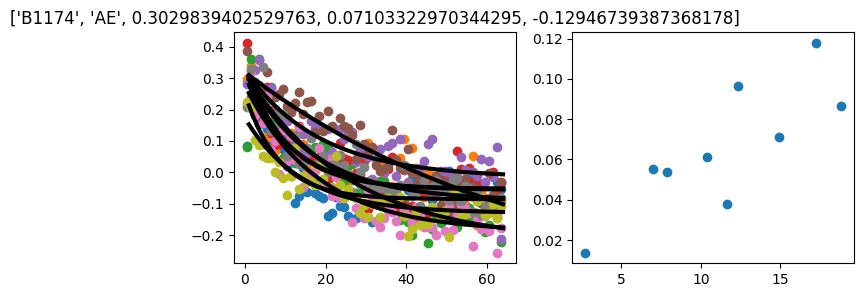

  5%|▌         | 1/20 [00:07<02:26,  7.68s/it]/tmp/ipykernel_14365/2662654033.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interpolation_data["distance_from_boundary"] = np.abs(
/tmp/ipykernel_14365/2662654033.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interpolation_data["distance_from_boundary"] = np.abs(
/tmp/ipykernel_14365/2662654033.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

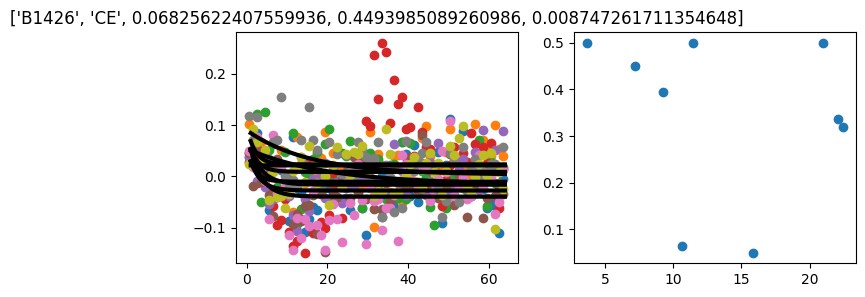

 10%|█         | 2/20 [00:13<02:00,  6.71s/it]/tmp/ipykernel_14365/2662654033.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interpolation_data["distance_from_boundary"] = np.abs(
/tmp/ipykernel_14365/2662654033.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interpolation_data["distance_from_boundary"] = np.abs(
/tmp/ipykernel_14365/2662654033.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

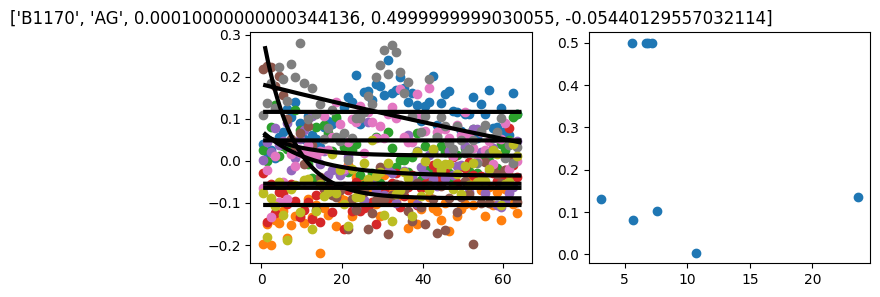

 15%|█▌        | 3/20 [00:20<01:58,  6.96s/it]/tmp/ipykernel_14365/2662654033.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interpolation_data["distance_from_boundary"] = np.abs(
/tmp/ipykernel_14365/2662654033.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interpolation_data["distance_from_boundary"] = np.abs(
/tmp/ipykernel_14365/2662654033.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

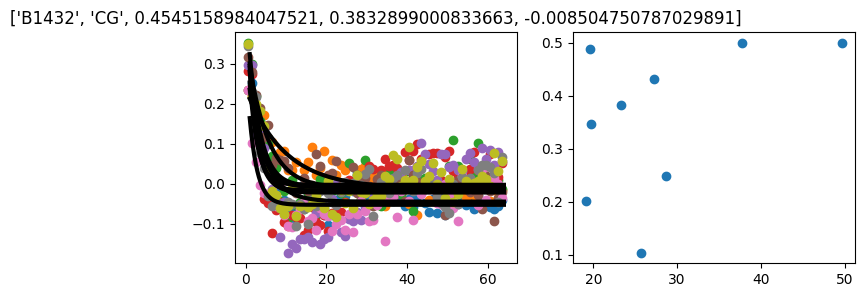

 20%|██        | 4/20 [00:29<02:04,  7.78s/it]/tmp/ipykernel_14365/2662654033.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interpolation_data["distance_from_boundary"] = np.abs(
/tmp/ipykernel_14365/2662654033.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interpolation_data["distance_from_boundary"] = np.abs(
/tmp/ipykernel_14365/2662654033.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

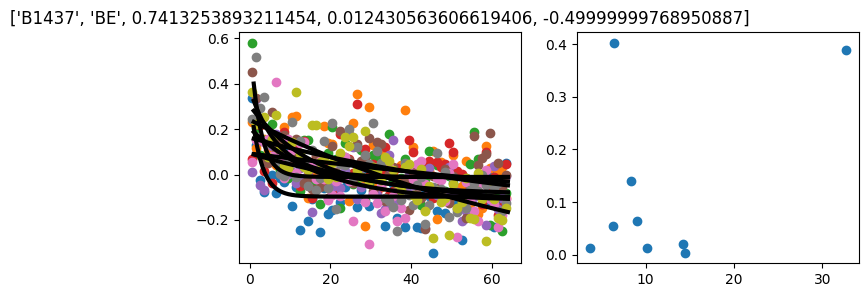

 25%|██▌       | 5/20 [00:34<01:38,  6.57s/it]/tmp/ipykernel_14365/2662654033.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interpolation_data["distance_from_boundary"] = np.abs(
/tmp/ipykernel_14365/2662654033.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interpolation_data["distance_from_boundary"] = np.abs(
/tmp/ipykernel_14365/2662654033.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

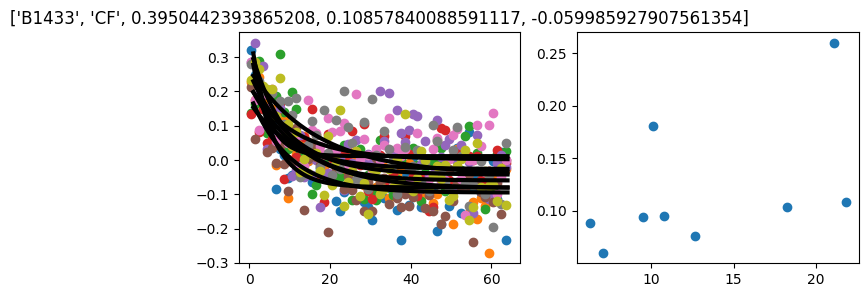

 30%|███       | 6/20 [00:38<01:18,  5.61s/it]/tmp/ipykernel_14365/2662654033.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interpolation_data["distance_from_boundary"] = np.abs(
/tmp/ipykernel_14365/2662654033.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interpolation_data["distance_from_boundary"] = np.abs(
/tmp/ipykernel_14365/2662654033.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

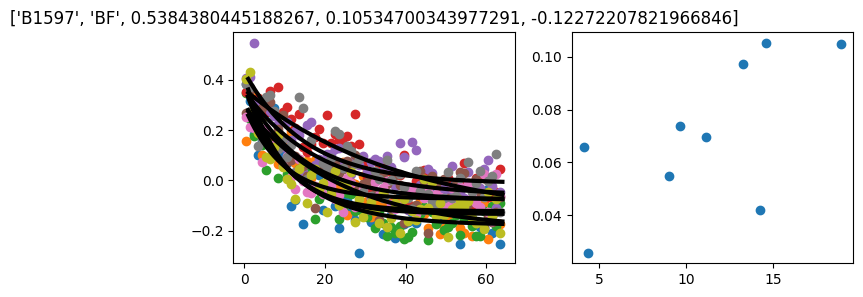

 35%|███▌      | 7/20 [00:42<01:06,  5.13s/it]/tmp/ipykernel_14365/2662654033.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interpolation_data["distance_from_boundary"] = np.abs(
/tmp/ipykernel_14365/2662654033.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interpolation_data["distance_from_boundary"] = np.abs(
/tmp/ipykernel_14365/2662654033.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

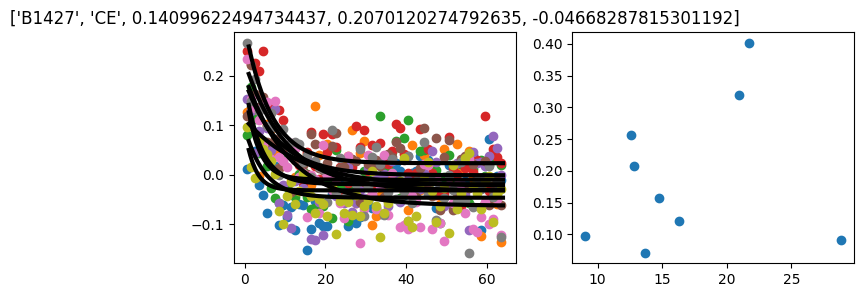

 40%|████      | 8/20 [00:48<01:04,  5.40s/it]/tmp/ipykernel_14365/2662654033.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interpolation_data["distance_from_boundary"] = np.abs(
/tmp/ipykernel_14365/2662654033.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interpolation_data["distance_from_boundary"] = np.abs(
/tmp/ipykernel_14365/2662654033.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

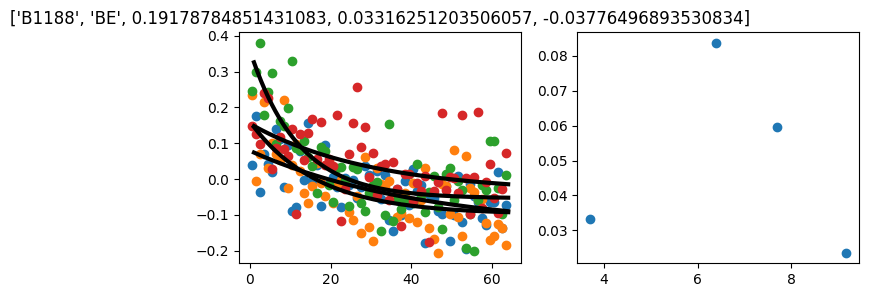

 45%|████▌     | 9/20 [00:50<00:48,  4.39s/it]/tmp/ipykernel_14365/2662654033.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interpolation_data["distance_from_boundary"] = np.abs(
/tmp/ipykernel_14365/2662654033.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interpolation_data["distance_from_boundary"] = np.abs(
/tmp/ipykernel_14365/2662654033.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

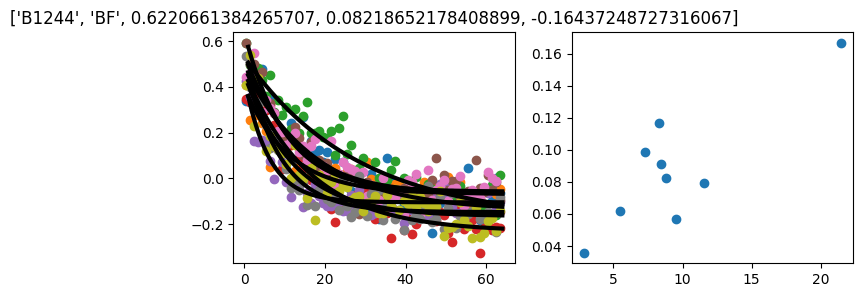

 50%|█████     | 10/20 [00:54<00:44,  4.43s/it]/tmp/ipykernel_14365/2662654033.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interpolation_data["distance_from_boundary"] = np.abs(
/tmp/ipykernel_14365/2662654033.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interpolation_data["distance_from_boundary"] = np.abs(
/tmp/ipykernel_14365/2662654033.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

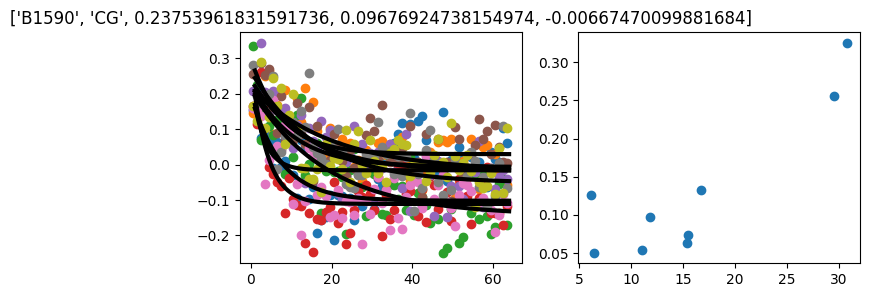

 55%|█████▌    | 11/20 [00:59<00:39,  4.34s/it]/tmp/ipykernel_14365/2662654033.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interpolation_data["distance_from_boundary"] = np.abs(
/tmp/ipykernel_14365/2662654033.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interpolation_data["distance_from_boundary"] = np.abs(
/tmp/ipykernel_14365/2662654033.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

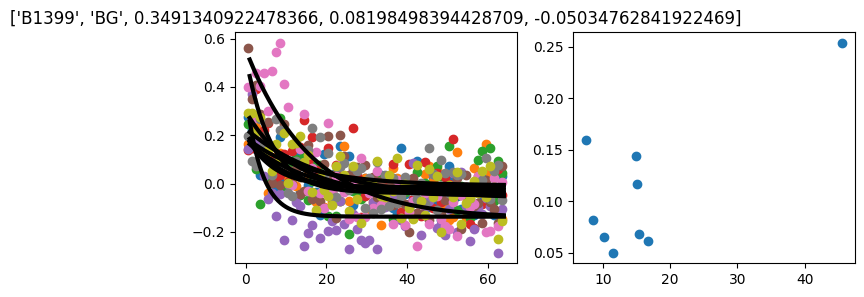

 60%|██████    | 12/20 [01:02<00:32,  4.01s/it]/tmp/ipykernel_14365/2662654033.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interpolation_data["distance_from_boundary"] = np.abs(
/tmp/ipykernel_14365/2662654033.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interpolation_data["distance_from_boundary"] = np.abs(
/tmp/ipykernel_14365/2662654033.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

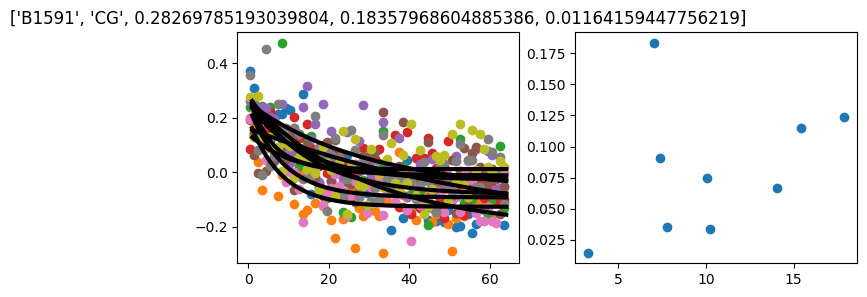

 65%|██████▌   | 13/20 [01:05<00:27,  3.88s/it]/tmp/ipykernel_14365/2662654033.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interpolation_data["distance_from_boundary"] = np.abs(
/tmp/ipykernel_14365/2662654033.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interpolation_data["distance_from_boundary"] = np.abs(
/tmp/ipykernel_14365/2662654033.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

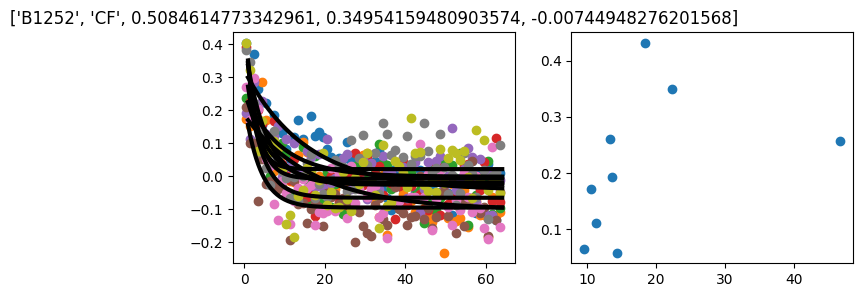

 70%|███████   | 14/20 [01:10<00:23,  3.96s/it]/tmp/ipykernel_14365/2662654033.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interpolation_data["distance_from_boundary"] = np.abs(
/tmp/ipykernel_14365/2662654033.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interpolation_data["distance_from_boundary"] = np.abs(
/tmp/ipykernel_14365/2662654033.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

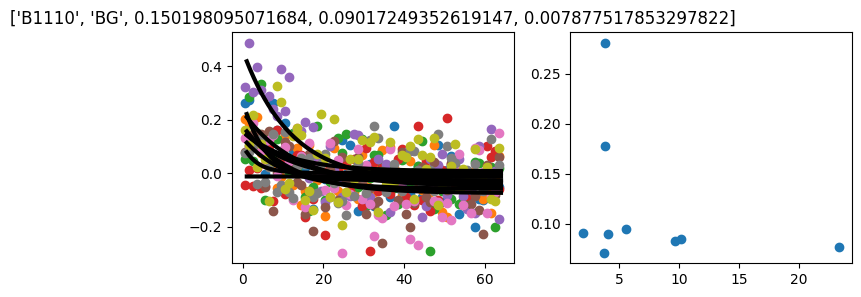

 75%|███████▌  | 15/20 [01:13<00:18,  3.76s/it]/tmp/ipykernel_14365/2662654033.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interpolation_data["distance_from_boundary"] = np.abs(
/tmp/ipykernel_14365/2662654033.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interpolation_data["distance_from_boundary"] = np.abs(
/tmp/ipykernel_14365/2662654033.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

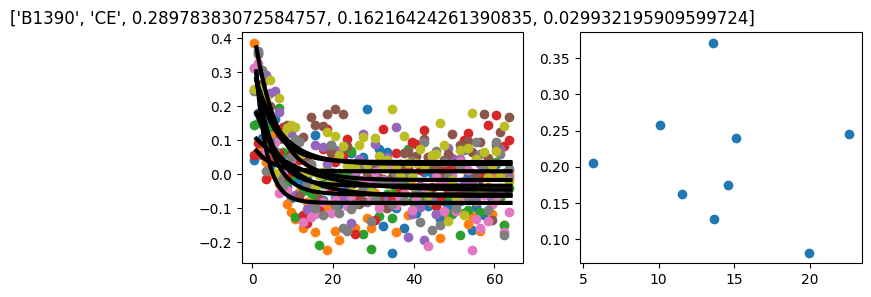

 80%|████████  | 16/20 [01:17<00:15,  3.96s/it]/tmp/ipykernel_14365/2662654033.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interpolation_data["distance_from_boundary"] = np.abs(
/tmp/ipykernel_14365/2662654033.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interpolation_data["distance_from_boundary"] = np.abs(
/tmp/ipykernel_14365/2662654033.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

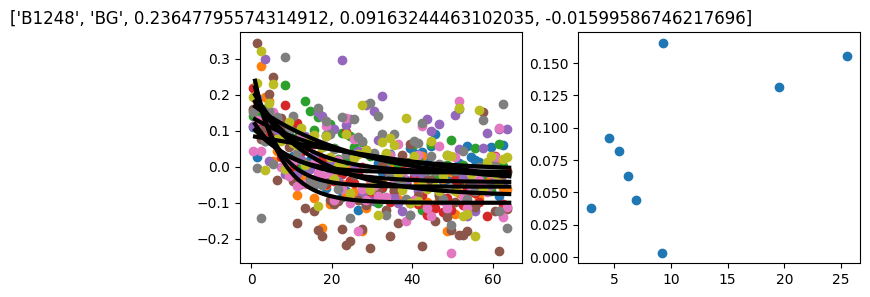

 85%|████████▌ | 17/20 [01:21<00:12,  4.01s/it]/tmp/ipykernel_14365/2662654033.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interpolation_data["distance_from_boundary"] = np.abs(
/tmp/ipykernel_14365/2662654033.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interpolation_data["distance_from_boundary"] = np.abs(
/tmp/ipykernel_14365/2662654033.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

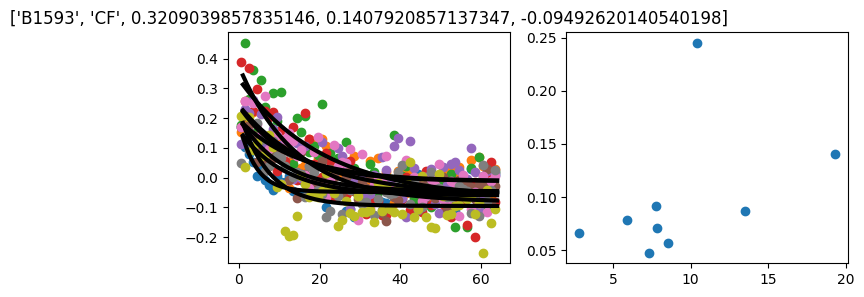

 90%|█████████ | 18/20 [01:26<00:08,  4.17s/it]/tmp/ipykernel_14365/2662654033.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interpolation_data["distance_from_boundary"] = np.abs(
/tmp/ipykernel_14365/2662654033.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interpolation_data["distance_from_boundary"] = np.abs(
/tmp/ipykernel_14365/2662654033.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

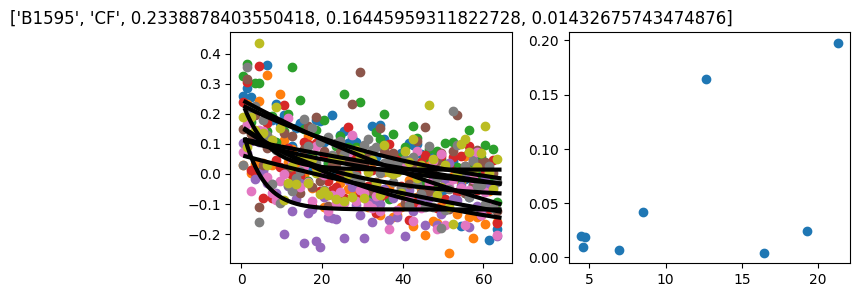

 95%|█████████▌| 19/20 [01:30<00:04,  4.10s/it]/tmp/ipykernel_14365/2662654033.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interpolation_data["distance_from_boundary"] = np.abs(
/tmp/ipykernel_14365/2662654033.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interpolation_data["distance_from_boundary"] = np.abs(
/tmp/ipykernel_14365/2662654033.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

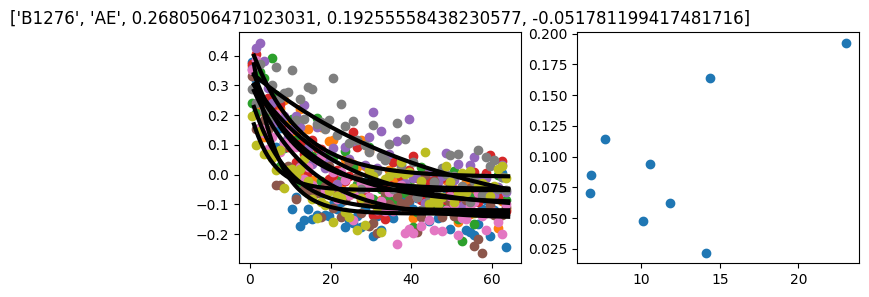

100%|██████████| 20/20 [01:34<00:00,  4.72s/it]


,bird,interpolation,e_init,e_decay_const,intercept,fit_slope,fit_range,r2
0,B1174,CF,0.335936,0.117928,-0.085412,17.269366,0.335936,0.006025
1,B1174,BF,0.365156,0.086452,-0.055953,18.84814,0.365156,0.008232
2,B1174,AG,0.540975,0.038066,-0.225412,11.653338,0.540975,0.018072


In [44]:
unit =  'interpolation_point'
fit_dfs = []
for subject in tqdm(behav_data_all.subject.unique()):
    subject_data = behav_data_all[(behav_data_all.subject == subject)]
    fit_dfs_bird = []

    fig, axs = plt.subplots(ncols=2, figsize=(8, 3))

    for interpolation in subject_data.interpolation.unique():
        interpolation_data = subject_data[(subject_data.interpolation == interpolation)]
        unique_units = np.unique(interpolation_data[unit].values)

        interpolation_data["distance_from_boundary"] = np.abs(
            interpolation_data[unit].values - np.median(unique_units)
        )

        x = interpolation_data.distance_from_boundary.values.astype(float)
        y = interpolation_data[rt_column].values.astype(float)

        # fit model
        results_exp_min, e_init, e_decay_const, intercept = fit_decay(x, y)
        r2 = 1 - np.sum((results_exp_min.residual) ** 2) / np.sum((y - np.mean(y)) ** 2)

        # get model values for x
        x_model = np.linspace(0, int(len(unique_units) / 2), 1000)
        fit_y = exp_decay(x=x_model, p=results_exp_min.params)
        fit_range = fit_y[0] - intercept

        # plot
        x_model = np.linspace(1, int(len(unique_units) / 2), 500)

        fit_y = exp_decay(x=x_model, p=results_exp_min.params)
        binned_rt = (
            interpolation_data[["distance_from_boundary", rt_column]]
            .groupby("distance_from_boundary")
            .describe()[rt_column][["mean", "count", "std"]]
            .reset_index()
        )
        ax = axs[0]
        ax.scatter(binned_rt.distance_from_boundary.values, binned_rt["mean"].values)
        ax.set_title([subject, interpolation, e_init, e_decay_const, intercept])
        ax.plot(x_model, fit_y, color="k", lw=3)
        # ax.set_ylim([0,2])

        fit_slope = fit_df_interp[
            (fit_df_interp.cue == "NC")
            & (fit_df_interp.bird == subject)
            & (fit_df_interp.interp == interpolation)
        ]._slope.values[0]
        fit_df = pd.Series(
            {
                "bird": subject,
                "interpolation": interpolation,
                "e_init": e_init,
                "e_decay_const": e_decay_const,
                "intercept": intercept,
                "fit_slope": fit_slope,
                "fit_range": fit_range,
                "r2": r2,
            }
        )
        fit_dfs_bird.append(fit_df)

    fit_df_bird = pd.concat(fit_dfs_bird, axis=1).T

    axs[1].scatter(fit_df_bird.fit_slope.values, fit_df_bird.e_decay_const.values)

    plt.show()

    fit_dfs.append(fit_df_bird)
fit_df = pd.concat(fit_dfs)
fit_df[:3]

In [45]:
fit_df[:3]

,bird,interpolation,e_init,e_decay_const,intercept,fit_slope,fit_range,r2
0,B1174,CF,0.335936,0.117928,-0.085412,17.269366,0.335936,0.006025
1,B1174,BF,0.365156,0.086452,-0.055953,18.84814,0.365156,0.008232
2,B1174,AG,0.540975,0.038066,-0.225412,11.653338,0.540975,0.018072


### Subset data without exp decay or with bad fits

In [46]:
birds_without_rts = ['B1426', '1170']
#birds_without_rts = ['B1426',  'B1170', 'B1427', 'B1188', 'B1437']

In [47]:
# normalize log slope by bird, and decay constant by bird
for bird in fit_df.bird.unique():
    m = fit_df.bird == bird
    fit_df.loc[m, 'fit_slope_z'] = z_score(np.log(fit_df[m].fit_slope.values.astype(float)))
    fit_df.loc[m, 'e_decay_const_z'] = z_score(fit_df[m].e_decay_const.values.astype(float))

In [48]:
# remove interpolations without good decay, and birds with no difference in RT
m = (fit_df.fit_range > 0.1) & (fit_df.bird.isin(birds_without_rts) == False) & (fit_df.r2 > 0.001)
fit_df_masked = fit_df[m]

### Statistics

In [49]:
df = fit_df_masked[['bird', 'e_decay_const', 'fit_slope']]
df['psychometric_slope'] = df['fit_slope']
df['rt_exp_decay'] = df['e_decay_const']
df = df[['bird', 'rt_exp_decay', 'psychometric_slope']]
# Convert 'class_' to categorical
#df['bird'] = df['bird'].astype('category')
df.rt_exp_decay = df.rt_exp_decay.astype(float)
df.psychometric_slope = df.psychometric_slope.astype(float)
df[:3]

/tmp/ipykernel_14365/3205548017.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['psychometric_slope'] = df['fit_slope']
/tmp/ipykernel_14365/3205548017.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rt_exp_decay'] = df['e_decay_const']


,bird,rt_exp_decay,psychometric_slope
0,B1174,0.117928,17.269366
1,B1174,0.086452,18.848140
2,B1174,0.038066,11.653338


In [50]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [51]:
# Mixed Linear Model
# Using 'subject' as a random effect and 'cue_prob' as a fixed effect
# Including 'class_' to control for side bias
model = smf.mixedlm("rt_exp_decay ~ psychometric_slope", df, groups=df["bird"], re_formula="~psychometric_slope")
result = model.fit()

# Summary of the model
result.summary()

/n/groups/datta/tim_sainburg/conda_envs/cdcp_paper/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:1634: UserWarning: Random effects covariance is singular
  warnings.warn(msg)
/n/groups/datta/tim_sainburg/conda_envs/cdcp_paper/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/n/groups/datta/tim_sainburg/conda_envs/cdcp_paper/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/n/groups/datta/tim_sainburg/conda_envs/cdcp_paper/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:1634: UserWarning: Random effects covariance is singular
  warnings.warn(msg)
/n/groups/datta/tim_sainburg/conda_envs/cdcp_paper/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:223

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Mixed Linear Model Regression Results
=======================================================================
Model:                 MixedLM     Dependent Variable:     rt_exp_decay
No. Observations:      153         Method:                 REML        
No. Groups:            19          Scale:                  0.0056      
Min. group size:       2           Log-Likelihood:         160.7529    
Max. group size:       9           Converged:              Yes         
Mean group size:       8.1                                             
-----------------------------------------------------------------------
                               Coef. Std.Err.   z   P>|z| [0.025 0.975]
-----------------------------------------------------------------------
Intercept                      0.046    0.014 3.294 0.001  0.018  0.073
psychometric_slope             0.005    0.001 5.586 0.000  0.004  0.007
Group Var                      0.000    0.023                          
Group x psychometric_slope Cov 0.000    0.001                          
psychometric_slope Var         0.000    0.000                          
=======================================================================

"""

### Plotting

In [52]:
from cdcp.visualization.utils import get_cat_colors

In [53]:
# this percent of interpolations were discluded because we failed to fit a decay
len(fit_df), np.sum(m), np.sum(m)/ len(fit_df)

(175, 153, 0.8742857142857143)

In [54]:
colors, pal, pal_dict = get_cat_colors(fit_df_masked.interpolation.values)

In [55]:
pal_dict = {'AE': np.array([0.12156863, 0.46666667, 0.70588235]),
 'AF': np.array([0.58039216, 0.40392157, 0.74117647]),
 'AG': np.array([0.83921569, 0.15294118, 0.15686275]),
 'BE': np.array([0.7372549 , 0.74117647, 0.13333333]),
 'BF': np.array([0.49803922, 0.49803922, 0.49803922]),
 'BG': np.array([0.54901961, 0.3372549 , 0.29411765]),
 'CE': np.array([0.89019608, 0.46666667, 0.76078431]),
 'CF': np.array([0.17254902, 0.62745098, 0.17254902]),
 'CG': np.array([1.        , 0.49803922, 0.05490196])}

In [56]:
colors = [pal_dict[i] for i in fit_df_masked.interpolation.values]

In [57]:
x = fit_df_masked["fit_slope_z"].values.astype(float)
y = fit_df_masked["e_decay_const_z"].values.astype(float)

In [58]:
fit_df_masked[:3]

,bird,interpolation,e_init,e_decay_const,intercept,fit_slope,fit_range,r2,fit_slope_z,e_decay_const_z
0,B1174,CF,0.335936,0.117928,-0.085412,17.269366,0.335936,0.006025,0.958578,1.754609
1,B1174,BF,0.365156,0.086452,-0.055953,18.84814,0.365156,0.008232,1.114678,0.690550
2,B1174,AG,0.540975,0.038066,-0.225412,11.653338,0.540975,0.018072,0.256701,-0.945159


In [59]:
len(x)

153

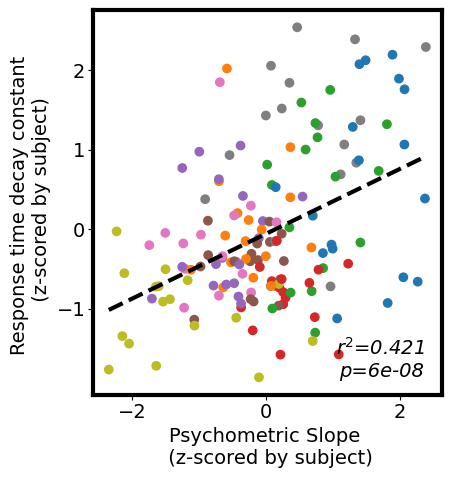

In [60]:
fig, ax = plt.subplots(figsize=(4.5,5))
ax.scatter(x, y, c = colors)
ax.set_xlabel('Psychometric Slope \n (z-scored by subject)', fontsize=14)
ax.set_ylabel('Response time decay constant \n (z-scored by subject)', fontsize=14)
for axis in ["top", "bottom", "left", "right"]:
    ax.spines[axis].set_linewidth(3)
    ax.spines[axis].set_color("k")
ax.tick_params(axis="both", labelsize=14, pad=15)

m, b = np.polyfit(x, y, 1)

x_line = np.linspace(np.min(x), np.max(x), 100)
plt.plot(x_line, m*x_line + b, color ='k', ls='dashed', lw=3)

correlation_sigma, p_value_sigma = scipy.stats.pearsonr(x,y)

ax.text(
    0.95,
    0.15,
    "r$^2$={}\np={:g}".format(round(correlation_sigma, 3), float('{:.1g}'.format(p_value_sigma))),
    horizontalalignment="right",
    verticalalignment="top",
    fontsize=14,
    color='k',
    #fontweight='bold',
    style='italic',
    transform=ax.transAxes
);
ax.set_yticks([-1, 0, 1, 2])
ax.yaxis.labelpad = 4
for tick in ax.get_yaxis().get_major_ticks():
    tick.set_pad(2.)
ax.xaxis.labelpad = 4
for tick in ax.get_xaxis().get_major_ticks():
    tick.set_pad(2.)